In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense


from sklearn.preprocessing import MinMaxScaler

In [3]:
df=pd.read_csv("E:\\journey to python\\Stock Price Prediction – Machine Learning Project in Python\\NSE-Tata-Global-Beverages-Limited.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


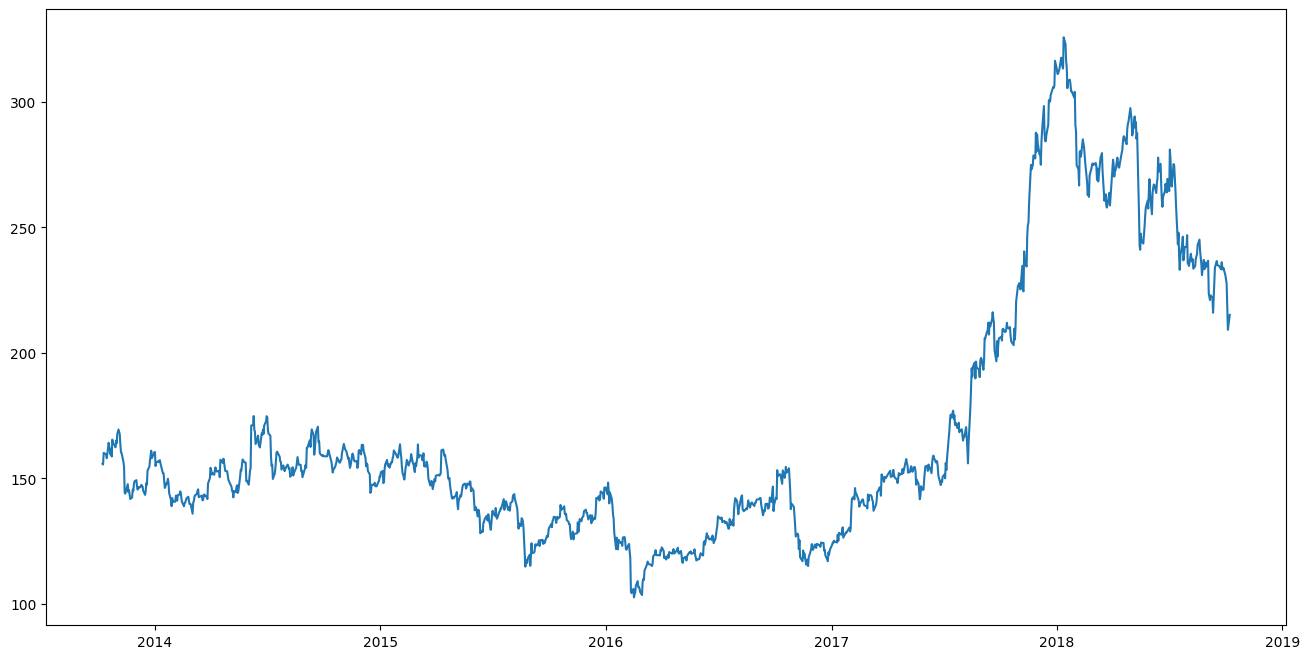

In [4]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']

plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Sorting data by date in ascending order
data = df.sort_index(ascending=True, axis=0)

# Creating a new DataFrame directly from the sorted data
new_dataset = pd.DataFrame({
    'Date': data['Date'].values,
    'Close': data['Close'].values
})

# Scaling the data (after dropping the Date column)
scaler = MinMaxScaler(feature_range=(0, 1))

# Dropping the 'Date' column, setting the index as 'Date'
new_dataset.index = new_dataset['Date']
new_dataset.drop('Date', axis=1, inplace=True)

# Final dataset as numpy array
final_dataset = new_dataset.values

# Splitting the dataset into train and validation sets
train_data = final_dataset[0:987, :]
valid_data = final_dataset[987:, :]

# Scaling the entire dataset
scaled_data = scaler.fit_transform(final_dataset)

# Preparing the training data
x_train_data, y_train_data = [], []

# Creating the sliding window for the LSTM (sequence of 60 previous days for training)
for i in range(60, len(train_data)):
    x_train_data.append(scaled_data[i-60:i, 0])  # Previous 60 values
    y_train_data.append(scaled_data[i, 0])  # Target value

# Converting to numpy arrays
x_train_data, y_train_data = np.array(x_train_data), np.array(y_train_data)

# Reshaping input to be [samples, time steps, features] for LSTM input
x_train_data = np.reshape(x_train_data, (x_train_data.shape[0], x_train_data.shape[1], 1))


In [12]:
# Define the LSTM model with Dropout layers for regularization
lstm_model = Sequential()

# First LSTM layer with return_sequences=True since another LSTM layer follows
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train_data.shape[1], 1)))

# Dropout to prevent overfitting
lstm_model.add(Dropout(0.2))

# Second LSTM layer
lstm_model.add(LSTM(units=50))

# Another Dropout layer for regularization
lstm_model.add(Dropout(0.2))

# Dense layer for final output (predicting one value)
lstm_model.add(Dense(1))

# Compiling the model
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

# Transforming the validation input data
inputs_data = new_dataset[len(new_dataset) - len(valid_data) - 60:].values
inputs_data = inputs_data.reshape(-1, 1)

# Ensure that the scaler was fit before using transform
inputs_data = scaler.transform(inputs_data)

# Fitting the model (consider more than 1 epoch for better results)
lstm_model.fit(x_train_data, y_train_data, epochs=20, batch_size=32, verbose=2)


c:\Users\PowerBrand Networks\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
29/29 - 5s - 174ms/step - loss: 0.0049
Epoch 2/20
29/29 - 1s - 37ms/step - loss: 0.0014
Epoch 3/20
29/29 - 1s - 37ms/step - loss: 0.0011
Epoch 4/20
29/29 - 1s - 36ms/step - loss: 0.0011
Epoch 5/20
29/29 - 1s - 46ms/step - loss: 9.9075e-04
Epoch 6/20
29/29 - 1s - 39ms/step - loss: 0.0010
Epoch 7/20
29/29 - 1s - 37ms/step - loss: 9.9461e-04
Epoch 8/20
29/29 - 1s - 39ms/step - loss: 0.0010
Epoch 9/20
29/29 - 1s - 43ms/step - loss: 9.1132e-04
Epoch 10/20
29/29 - 2s - 52ms/step - loss: 7.7400e-04
Epoch 11/20
29/29 - 1s - 39ms/step - loss: 8.2530e-04
Epoch 12/20
29/29 - 2s - 52ms/step - loss: 8.0134e-04
Epoch 13/20
29/29 - 1s - 48ms/step - loss: 7.8465e-04
Epoch 14/20
29/29 - 3s - 101ms/step - loss: 7.2949e-04
Epoch 15/20
29/29 - 3s - 90ms/step - loss: 7.7884e-04
Epoch 16/20
29/29 - 3s - 93ms/step - loss: 7.8055e-04
Epoch 17/20
29/29 - 1s - 49ms/step - loss: 7.1741e-04
Epoch 18/20
29/29 - 1s - 35ms/step - loss: 6.7868e-04
Epoch 19/20
29/29 - 1s - 37ms/step - loss: 7.2283e-04
Epoch

In [13]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step


In [14]:
lstm_model.save("saved_model.h5")

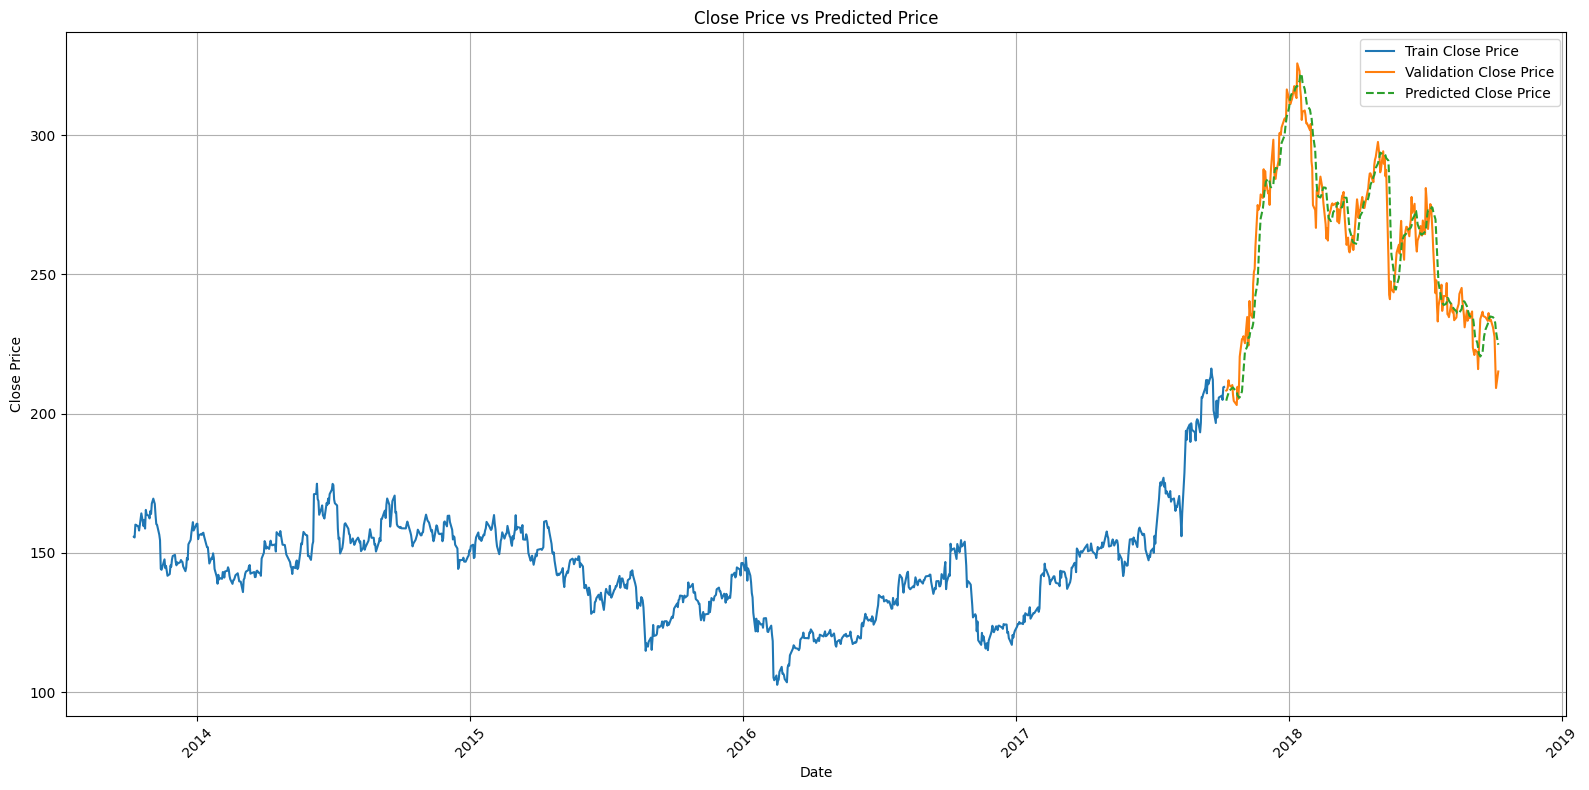

In [18]:
# Ensure predicted_closing_price has the correct length
if len(predicted_closing_price) == len(valid_data):
    valid_data.loc[:, 'Predictions'] = predicted_closing_price  # Use .loc to avoid SettingWithCopyWarning
else:
    print(f"Length mismatch: valid_data ({len(valid_data)}) and predicted_closing_price ({len(predicted_closing_price)})")

# Plotting train and validation data along with predictions
plt.figure(figsize=(16, 8))

# Plot training data
plt.plot(train_data["Close"], label="Train Close Price")

# Plot validation data
plt.plot(valid_data["Close"], label="Validation Close Price")

# Plot predicted data if Predictions column exists
if 'Predictions' in valid_data.columns:
    plt.plot(valid_data["Predictions"], label="Predicted Close Price", linestyle='--')  # Use dashed line for predictions

# Adding title and labels
plt.title("Close Price vs Predicted Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()  # Show the legend
plt.grid()  # Optional: Add a grid for better readability
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better visibility
plt.tight_layout()  # Optional: Adjust layout for better fit
plt.show()  # Display the plot
